# Final Project (part 8)
#### By Shubhankar Kumar

### 8. Similarity analysis of Subject & Message

In [1]:
commits_df = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/shubhankark/newcommits")

In [2]:
#sampled_data = commits_df.sample(withReplacement=False, fraction=5000/commits_df.count(), seed=42)

In [3]:
#sampled_data.write.parquet("gs://msca-bdp-students-bucket/shared_data/shubhankark/samplecommits")

In [4]:
commits_df = commits_df.drop("commit","author","committer","tree","parent","committer", "trailer","difference","difference_truncated","repo_name","encoding")

In [5]:
commits_df.show(5)

+--------------------+--------------------+
|             subject|             message|
+--------------------+--------------------+
|    Initial revision|   Initial revision
|
|Bump ffi from 1.9...|Bump ffi from 1.9...|
|[core] Implement ...|[core] Implement ...|
|am 5ffee03c: am 8...|am 5ffee03c: am 8...|
|Adds simple examp...|Adds simple examp...|
+--------------------+--------------------+
only showing top 5 rows



In [6]:
from pyspark.sql.functions import countDistinct


# Calculate distinct counts for "subject" and "message"
distinct_subject_count = commits_df.select(countDistinct("subject")).first()[0]
distinct_message_count = commits_df.select(countDistinct("message")).first()[0]

# Total number of rows
total_rows = commits_df.count()

# Print the results
print(f"Distinct count of 'subject': {distinct_subject_count}")
print(f"Distinct count of 'message': {distinct_message_count}")
print(f"Total number of rows: {total_rows}")


Distinct count of 'subject': 24663
Distinct count of 'message': 24942
Total number of rows: 26782


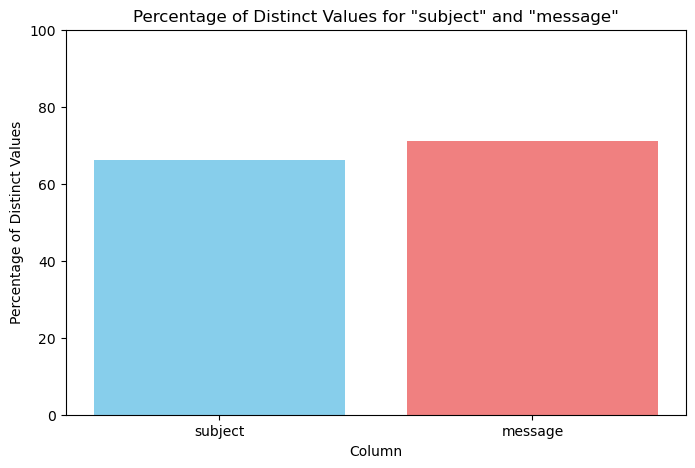

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the distinct counts calculated
distinct_subject_count = 175638399
distinct_message_count = 188540814
total_rows = 265419190

# Calculate the percentage of distinct values
percentage_subject = (distinct_subject_count / total_rows) * 100
percentage_message = (distinct_message_count / total_rows) * 100

# Create a DataFrame for plotting
data = {
    'Column': ['subject', 'message'],
    'Percentage': [percentage_subject, percentage_message]
}
plot_df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(plot_df['Column'], plot_df['Percentage'], color=['skyblue', 'lightcoral'])
plt.xlabel('Column')
plt.ylabel('Percentage of Distinct Values')
plt.title('Percentage of Distinct Values for "subject" and "message"')
plt.ylim(0, 100)
plt.show()

In [8]:
from pyspark.sql.functions import countDistinct

# Calculate distinct counts for "subject" and "message"
distinct_subject_count = commits_df.select(countDistinct("subject")).first()[0]
distinct_message_count = commits_df.select(countDistinct("message")).first()[0]

# Calculate the distinct counts for both "subject" and "message" together
distinct_subject_message_count = commits_df.select(countDistinct("subject", "message")).first()[0]

# Print the results
print(f"Distinct count of 'subject': {distinct_subject_count}")
print(f"Distinct count of 'message': {distinct_message_count}")
print(f"Distinct count of both 'subject' and 'message' together: {distinct_subject_message_count}")

Distinct count of 'subject': 24663
Distinct count of 'message': 24942
Distinct count of both 'subject' and 'message' together: 24942


In [ ]:
from pyspark.sql.functions import col

# Assuming you have the commits_df DataFrame

# Filter rows where "subject" and "message" are the same
same_subject_message_count = commits_df.filter(col("subject") == col("message")).count()

# Total number of rows
total_rows = commits_df.count()

# Print the results
print(f"Number of rows where 'subject' and 'message' are the same: {same_subject_message_count}")
print(f"Total number of rows: {total_rows}")

Number of rows where 'subject' and 'message' are the same: 2651
Total number of rows: 26782
